**Importing Dependencies**

In [183]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import numpy as np

**Loading training and testing data**

In [184]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [185]:
print(X_train.shape)
print(y_train.shape)
#training data 60000 images of 28*28 resolution

(60000, 28, 28)
(60000,)


In [186]:
print(X_test.shape)
print(y_test.shape)
#testing data 60000 images of 28*28 resolution

(10000, 28, 28)
(10000,)


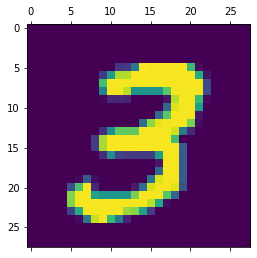

In [187]:
plt.matshow(X_train[7])
plt.show()
#printing the image at 7th index

In [188]:
print(y_train[7])
#printing the label of 7th index

3


**Scaling the data to make it fit for learning**

In [189]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [190]:
total_neurons = X_train.shape[1] * X_train.shape[2] #total neurons at input layers would be 28*28 = 784

#flattening the data into a 2D array to mimic the neural behavior
X_train_flattened = X_train_scaled.reshape(len(X_train), total_neurons)
X_test_flattened = X_test_scaled.reshape(len(X_test), total_neurons)

In [191]:
X_train_flattened.shape #flattened data now has 2 dimensions only. 
#x is number of images and y is the total number of pixals in each image.

(60000, 784)

**Perceptron (Simplest neural network with only one layer)**

In [192]:
no_output_neurons = 10 #since we have to classify between 0-9, we'll have 10 neurons on the output layer.
model = keras.Sequential([
    keras.layers.Dense(no_output_neurons, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
iterations = 10
model.fit(X_train_flattened, y_train, epochs=iterations)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4732 - accuracy: 0.8761
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3042 - accuracy: 0.9146
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2830 - accuracy: 0.9211
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2730 - accuracy: 0.9241
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2670 - accuracy: 0.9260
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2615 - accuracy: 0.9275
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2586 - accuracy: 0.9281
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2559 - accuracy: 0.9289
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2530 - accuracy: 0.9298
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.251

In [193]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2688 - accuracy: 0.9255


[0.2687673270702362, 0.9254999756813049]

**Accuracy: 0.9255**

In [194]:
output_neurons = model.predict(X_test_flattened)

**Classifier function to make prediction based on testing data**

In [195]:
def classifier(index):
  print("Image at index", index, "is shown below:")
  plt.matshow(X_test[index])
  plt.show()
  return np.argmax(output_neurons[index])

Please enter an index: 30
Image at index 30 is shown below:


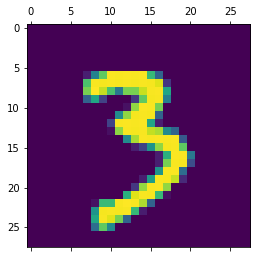



Neural Network prediction: 3


In [196]:
a = int(input("Please enter an index: "))
result = classifier(a)
print("\n\nNeural Network prediction:", result)

In [197]:
output_neurons_labels = [np.argmax(x) for x in output_neurons]

**Function to make confusion matrix**

In [198]:
def confusionMatrix(y_test, output_neurons_labels):
  confusionMatrix = tf.math.confusion_matrix(labels=y_test, predictions=output_neurons_labels)
  plt.figure(figsize = (10,7))
  sn.heatmap(confusionMatrix, annot=True, fmt='d')
  plt.xlabel('Predicted')
  plt.ylabel('Truth')

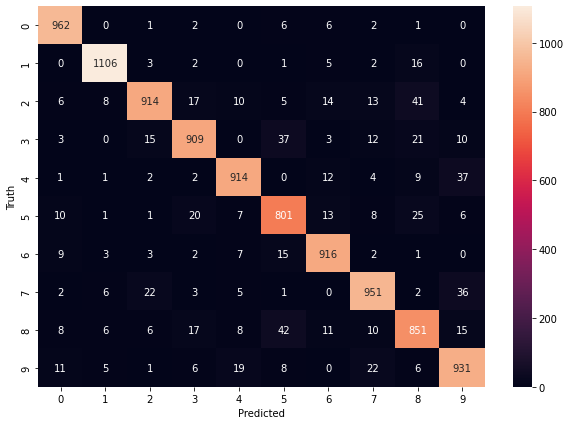

In [199]:
confusionMatrix(y_test, output_neurons_labels)

**Neural Network with 4 hidden layers**

In [206]:
no_output_neurons = 10 #since we have to classify between 0-9, we'll have 10 neurons on the output layer.

#we have 4 hidden layers in this neural network,
first_hiddenLayer = 512
second_hiddenLayer = 256
third_hiddenLayer = 128
fourth_hiddenLayer = 16

model = keras.Sequential([
    keras.layers.Dense(first_hiddenLayer, input_shape=(784,), activation='relu'),
    keras.layers.Dense(second_hiddenLayer, activation='relu'),
    keras.layers.Dense(third_hiddenLayer, activation='relu'),
    keras.layers.Dense(fourth_hiddenLayer, activation='relu'),
    keras.layers.Dense(no_output_neurons, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
iterations = 10
model.fit(X_train_flattened, y_train, epochs=iterations)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2201 - accuracy: 0.9351
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0972 - accuracy: 0.9713
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0678 - accuracy: 0.9794
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0559 - accuracy: 0.9828
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0441 - accuracy: 0.9868
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0371 - accuracy: 0.9883
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0308 - accuracy: 0.9907
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0276 - accuracy: 0.9920
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0259 - accuracy: 0.9920
Epoch 10/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.022

In [207]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0733 - accuracy: 0.9821


[0.07329662889242172, 0.9821000099182129]

**Accuracy: 0.9821**

In [208]:
output_neurons = model.predict(X_test_flattened)

Please enter an index: 765
Image at index 765 is shown below:


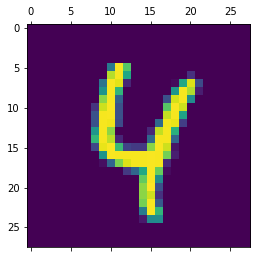



Neural Network prediction: 4


In [218]:
a = int(input("Please enter an index: "))
result = classifier(a)
print("\n\nNeural Network prediction:", result)

In [210]:
output_neurons_labels = [np.argmax(x) for x in output_neurons]

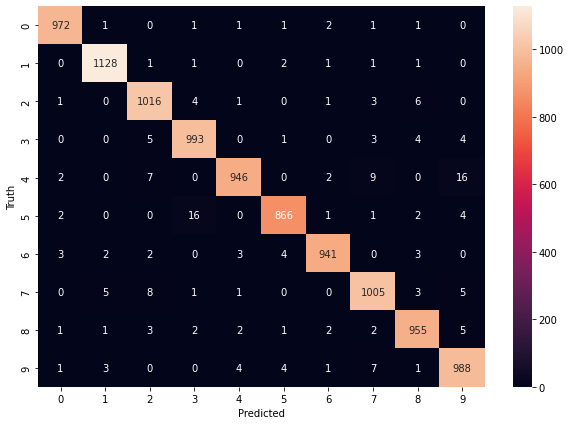

In [211]:
confusionMatrix(y_test, output_neurons_labels)